### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
# Import and read the data file:
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [3]:
# Any missing values? No.
reviews_na = reviews[reviews.isna().any(axis = 1)]
print(reviews_na.shape)

reviews_na

(0, 11)


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary


In [4]:
# Replace the missing values with 0 if need be
# df.fillna(0, inplace=True)

In [5]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [6]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [7]:
# Drop unnecessary columns.
reviews = reviews.drop(['language', 
                    'platform'], axis = 1)

# View column names.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 3. Rename columns

In [8]:
# Rename the column headers.
reviews = reviews\
.rename(columns={'remuneration (k£)':'remuneration',
                 'spending_score (1-100)':'spending_score'})

# View column names.
reviews.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 4. Save the DataFrame as a CSV file

In [9]:
# Create a CSV file as output.
reviews.to_csv('reviews_final.csv')

In [10]:
# Import new CSV file with Pandas.
turtle_reviews = pd.read_csv('reviews_final.csv')

# View DataFrame.
turtle_reviews

,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...
1995,1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [11]:
# Drop unnecessary columns.
turtle_reviews = turtle_reviews.drop(['Unnamed: 0'], axis = 1)

# View column names.
turtle_reviews.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [12]:
turtle_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


## 5. Linear regression

### 5a) spending vs loyalty

In [13]:
# Define the independent variable.loyalty_points
x = turtle_reviews['loyalty_points']

# Define the dependent variable.spending_score
y = turtle_reviews['spending_score'] 

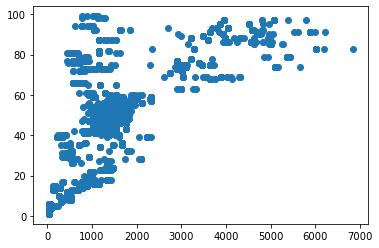

In [14]:
# Check for linearity.
plt.scatter(x, y)

In [15]:
# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x'
turtle_reviews = ols(f, data = turtle_reviews).fit()

# Print the regression table.
turtle_reviews.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 19 Aug 2022   Prob (F-statistic):          2.92e-263
Time:                        15:26:43   Log-Likelihood:                -8759.4
No. Observations:                2000   AIC:                         1.752e+04
Df Residuals:                    1998   BIC:                         1.753e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.4260      0.685     41.504      0.000      27.083      29.769
x              0.0137      0.000     40.595      0.000       0.013       0.014
==============================================================================
Omnibus:                      169.397   Durbin-Watson:                   2.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.607
Skew:                           0.768   Prob(JB):                     6.81e-47
Kurtosis:                       3.441   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# Extract the estimated parameters.
print("Parameters: ", turtle_reviews.params)  

# Extract the standard errors.
print("Standard errors: ", turtle_reviews.bse)   

# Extract the predicted values.
print("Predicted values: ", turtle_reviews.predict()) 

Parameters:  Intercept    28.426033
x             0.013671
dtype: float64
Standard errors:  Intercept    0.684905
x            0.000337
dtype: float64
Predicted values:  [ 31.29703545  35.58986696  28.97289101 ... 105.17748592  42.75370042
  34.97465225]


In [17]:
# Set the X coefficient and the constant to generate the regression table.
# x coef: 0.0137.
# Constant coef: 28.4260.

y_pred = 0.0137 * x + 28.4260

y_pred

0        31.3030
1        35.6048
2        28.9740
3        36.1254
4        33.4402
          ...   
1995     83.6507
1996     35.8103
1997    105.3378
1998     42.7836
1999     34.9883
Name: loyalty_points, Length: 2000, dtype: float64

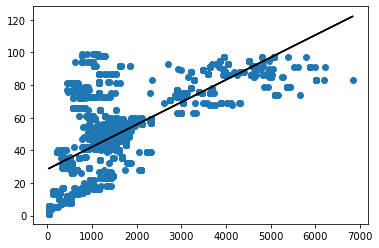

In [18]:
# Plot the graph with a regression line.
plt.scatter(x, y)

plt.plot(x, y_pred, color='black')

# 5b) renumeration vs loyalty

In [19]:
# Define the independent variable.
x = turtle_reviews['loyalty_points']

# Define the dependent variable.
y = turtle_reviews['remuneration'] 

TypeError: 'RegressionResultsWrapper' object is not subscriptable

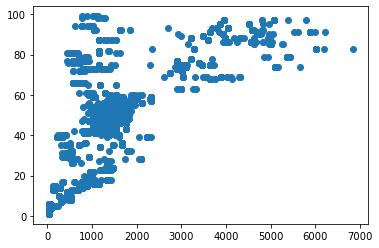

In [20]:
# Check for linearity.
plt.scatter(x, y)

In [ ]:
# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x'
turtle_reviews = ols(f, data = turtle_reviews).fit()

# Print the regression table.
turtle_reviews.summary() 

In [21]:
# Extract the estimated parameters.
print("Parameters: ", turtle_reviews.params)  

# Extract the standard errors.
print("Standard errors: ", turtle_reviews.bse)   

# Extract the predicted values.
print("Predicted values: ", turtle_reviews.predict()) 

Parameters:  Intercept    28.426033
x             0.013671
dtype: float64
Standard errors:  Intercept    0.684905
x            0.000337
dtype: float64
Predicted values:  [ 31.29703545  35.58986696  28.97289101 ... 105.17748592  42.75370042
  34.97465225]
ERROR! Session/line number was not unique in database. History logging moved to new session 328


In [ ]:
# Set the X coefficient and the constant to generate the regression table.
# x coef: 0.011101.
# Constant coef: 30.560555.

y_pred = 0.011101 * x + 30.560555

y_pred

In [ ]:
# Plot the graph with a regression line.
plt.scatter(x, y)

plt.plot(x, y_pred, color='black')

### 5c) age vs loyalty

In [ ]:
# Independent variable.
# Define the independent variable.
x = turtle_reviews['loyalty_points']

# Define the dependent variable.
y = turtle_reviews['age'] 

In [ ]:
# Check for linearity.
plt.scatter(x, y)

In [ ]:
# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x'
turtle_reviews = ols(f, data = turtle_reviews).fit()

# Print the regression table.
turtle_reviews.summary() 

In [ ]:
# Extract the estimated parameters.
print("Parameters: ", turtle_reviews.params)  

# Extract the standard errors.
print("Standard errors: ", turtle_reviews.bse)   

# Extract the predicted values.
print("Predicted values: ", turtle_reviews.predict()) 

In [ ]:
# Set the X coefficient and the constant to generate the regression table.
# x coef: -0.000449.
# Constant coef: 40.203457.

y_pred = -0.000449 * x + 40.203457

y_pred

In [ ]:
# Plot the graph with a regression line.
plt.scatter(x, y)

plt.plot(x, y_pred, color='black')

## 6. Observations and insights

***Your observations here...***






# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [23]:
# Import necessary libraries.
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import new CSV file with Pandas.
turtle_reviews = pd.read_csv('reviews_final.csv')

# View DataFrame.
turtle_reviews

In [ ]:
# Drop unnecessary columns
df2 = turtle_reviews.drop(['age','loyalty_points','education','product','review','summary'], axis = 1)

# View DataFrame.'gender',
df2

In [ ]:
# Explore the data.
df2.info()

In [ ]:
# Descriptive statistics.
df2.describe()

## 2. Plot

In [ ]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration', y='spending_score',
                data=df2, hue='gender')

In [ ]:
# Create a pairplot with Seaborn.
x = df2[['remuneration', 'spending_score']]

sns.pairplot(df2, vars=x,
              hue='gender', diag_kind= 'kde')

## 3. Elbow and silhoutte methods

In [ ]:
# Determine the number of clusters: Elbow method.
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS (clusters)")

plt.show()

In [ ]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil (range of clusters)")

plt.show()

## 4. Evaluate k-means model at different values of *k*

Evaluate and fit the model

In [ ]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [ ]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [ ]:
# Use 6 clusters:
kmeans = KMeans(n_clusters = 6, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

## 5. Fit final model and justify your choice

In [ ]:
# Apply the final model.
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [ ]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

Cluster 1 has the most data points, followed by cluster 0.

## 6. Plot and interpret the clusters

In [ ]:
# Visualising the clusters.
# View the DataFrame.
print(x.head())

In [ ]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black','yellow'])

## 7. Discuss: Insights and observations

***Your observations here...***

5 clusters are clearly visible with some outliers

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [24]:
# Import all the necessary packages.

!pip install wordcloud
!pip install textblob

import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt
import re
import seaborn as sns

nltk.download ('punkt')
nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/donatapollock/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/donatapollock/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
# Import new CSV file with Pandas.
df3 = pd.read_csv('reviews_final.csv')

# View DataFrame.
df3

,Unnamed: 0,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...
1995,1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [ ]:
# Explore data set.
df3.info()

In [26]:
# Drop unnecessary columns
df3 = df3.drop(['Unnamed: 0', 'gender', 'remuneration',  'spending_score', 'age','loyalty_points','education','product'], axis = 1)

# View DataFrame
df3

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [ ]:
# Any missing values? No.
# df3 = df3[df3.isna().any(axis = 1)]
# print(df3_na.shape)

# df3

In [27]:
# Drop the empty rows.
df3.dropna(subset=['review','summary'], inplace=True)

# View the shape of the DataFrame.
df3.shape

(2000, 2)

In [ ]:
# View DataFrame.
df3

In [28]:
df3.duplicated().sum()

18

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [29]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,Another worthless Dungeon Master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,Five Stars
4,as my review of gf9's previous screens these w...,Money trap


In [ ]:
df3.duplicated().sum()

In [30]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


In [ ]:
df3.duplicated().sum()

In [ ]:
# Summary: Change all to lower case and join with a space.
# df3['summary'] = df3['summary'].str.lower()

In [ ]:
# Display the Datafra
df3

In [31]:
df3.duplicated().sum()

25

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [32]:
# Replace all the punctuations in review column.
# Import the necessary module.
import re

import warnings
warnings.filterwarnings('ignore')

# https://stackoverflow.com/questions/42882019/trying-to-remove-punctuations-from-a-column-in-pandas

In [33]:
# Replace all the puncuations in review column.[\.\?\!\,\:\;\"]
df3['review'] = df3['review'].str.replace('[^\w\s]','')

In [34]:
df3.duplicated().sum()

39

In [35]:
# Replace all the puncuations in summary column.[^\w\s]
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

In [36]:
df3.duplicated().sum()

39

In [ ]:
# Display the Dataframe
df3

### 2c) Drop duplicates in both columns

In [ ]:
df3.duplicated().sum()

In [37]:
# Drop duplicates in both columns.
df3 = df3.drop_duplicates(subset=['review','summary'])

# View DataFrame.
df3.reset_index(inplace=True)
df3.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [38]:
df3.duplicated().sum()

0

In [39]:
df3

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap
...,...,...,...
1956,1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1957,1996,great game did not think i would like it when ...,super fun
1958,1997,great game for all keeps the mind nimble,great game
1959,1998,fun game,four stars


## 3. Tokenise and create wordclouds

In [40]:
# Create new DataFrame (copy DataFrame).
# df3_copy = pd.concat([no_punct_review, no_punct_summary], ignore_index=True)

df3_copy = df3.copy()
df3_copy.shape

(1961, 3)

In [ ]:
df3_copy

In [ ]:
df3_copy.describe()

In [41]:
# Apply tokenisation to both columns. 
df3_copy['reviewtokens'] = df3_copy['review'].apply(word_tokenize)

# Preview data.
df3_copy['reviewtokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: reviewtokens, dtype: object

In [42]:
df3_copy['summarytokens'] = df3_copy['summary'].apply(word_tokenize)
# Preview data.
df3_copy['summarytokens'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: summarytokens, dtype: object

In [ ]:
df3_copy

In [43]:
# Assign the raw text data to a variable.,'reviewtokens',

# Define an empty list of tokens.
summarytokens = []

for i in range(df3_copy.shape[0]):
    # Add each token to the list.
    summarytokens = summarytokens + df3_copy['summarytokens'][i]

In [44]:
# Assign the raw text data to a variable.,'reviewtokens',

# Define an empty list of tokens.
reviewtokens = []

for i in range(df3_copy.shape[0]):
    # Add each token to the list.
    reviewtokens = reviewtokens + df3_copy['reviewtokens'][i]

In [45]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

In [51]:
# Review: Create a word cloud for 'summarytokens'.
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(summarytokens) 

TypeError: expected string or bytes-like object

In [47]:
# Review: Plot the WordCloud image.
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

NameError: name 'word_cloud' is not defined

<Figure size 1152x648 with 0 Axes>

In [52]:
# Summary: Create a word cloud.
# Review: Create a word cloud for 'reviewtokens'.
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(reviewtokens) 

TypeError: expected string or bytes-like object

In [49]:
# Summary: Plot the WordCloud image.
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

NameError: name 'word_cloud' is not defined

<Figure size 1152x648 with 0 Axes>

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [ ]:
# Determine the frequency distribution.
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(reviewtokens)

# Preview data.
fdist

In [ ]:
# Determine the frequency distribution.
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(summarytokens)

# Preview data.
fdist

### 4b) Remove alphanumeric characters and stopwords

In [ ]:
# Delete all the alpanum.
reviewtokens1 = [word for word in reviewtokens if word.isalnum()]

In [ ]:
summarytokens1 = [word for word in summarytokens if word.isalnum()]

In [ ]:
# Remove all the stopwords
# Download the stop word list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
reviewtokens2 = [x for x in reviewtokens1 if x.lower() not in english_stopwords]

# Define an empty string variable.
reviewtokens2_string = ''

for value in reviewtokens2:
    # Add each filtered token word to the string.
    reviewtokens2_string = reviewtokens2_string + value + ' '

In [ ]:
# Create a filtered list of tokens without stop words.
summarytokens2 = [x for x in summarytokens1 if x.lower() not in english_stopwords]

# Define an empty string variable.
summarytokens2_string = ''

for value in summarytokens2:
    # Add each filtered token word to the string.
    summarytokens2_string = summarytokens2_string + value + ' '

### 4c) Create wordcloud without stopwords

In [ ]:
# Create a wordcloud without stop words reviewtokens2_string
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(reviewtokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [ ]:
# Create a wordcloud without stop words.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(summarytokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [ ]:
# Determine the 15 most common words.
fdist1 = FreqDist(reviewtokens2)

# Preview the data.
fdist1

In [ ]:
fdist1 = FreqDist(summarytokens2)

# Preview the data.
fdist1

In [ ]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
reviewtokens_counts = pd.DataFrame(Counter(reviewtokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
reviewtokens_counts

In [ ]:
ax = reviewtokens_counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Review: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

In [ ]:
# Generate a DataFrame from Counter.
summarytokens_counts = pd.DataFrame(Counter(summarytokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
summarytokens_counts

In [ ]:
ax = summarytokens_counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Summary: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [ ]:
# Provided function.
# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [ ]:
df3_copy

In [ ]:
# Determine polarity of both columns.
# Populate a new column with polarity scores for each comment.
df3_copy['reviewpolarity'] = df3_copy['review'].apply(generate_polarity)

# Preview the sentiment polarity scores
df3_copy['reviewpolarity'].head()

In [ ]:
# Populate a new column with polarity scores for each comment.
df3_copy['summarypolarity'] = df3_copy['summary'].apply(generate_polarity)

# Preview the sentiment polarity scores
df3_copy['summarypolarity'].head()

In [ ]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3_copy['reviewpolarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Review histogram of sentiment score polarity', fontsize=20)

plt.show();

# Histogram of sentiment score


This plot shows us that most comments sit closest to positive sentiment. more subjective than objective.

In [ ]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3_copy['summarypolarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Summary histogram of sentiment score polarity', fontsize=20)

plt.show();

# Histogram of sentiment score


This plot shows us that most comments sit closest to positive sentiment. very objective.

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [ ]:
# Top 20 negative reviews.
# Create a DataFrame.
negative_sentiment = df3_copy.nsmallest(10, 'reviewpolarity')

# Eliminate unnecessary columns.
# negative_sentiment = negative_sentiment[['COMMENTS', 'USERTYPE', 'polarity', 'STREETSEGID']]

# Eliminate unnecessary columns.
negative_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

# View output.


In [ ]:
# Top 20 negative summaries.
# Create a DataFrame.
negative_sentiment = df3_copy.nsmallest(10, 'summarypolarity')

# Eliminate unnecessary columns.
# negative_sentiment = negative_sentiment[['COMMENTS', 'USERTYPE', 'polarity', 'STREETSEGID']]

# Eliminate unnecessary columns.
negative_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})

# View output.


In [ ]:
# Top 20 positive reviews.
# Create a DataFrame.
positive_sentiment = df3_copy.nlargest(20, 'reviewpolarity')

# Eliminate unnecessary columns.
# positive_sentiment = positive_sentiment[['COMMENTS', 'USERTYPE', 'polarity', 'subjectivity', 'STREETSEGID']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

# View output.


In [ ]:
# Top 20 positive summaries.
# Create a DataFrame.
positive_sentiment = df3_copy.nlargest(20, 'summarypolarity')

# Eliminate unnecessary columns.
# positive_sentiment = positive_sentiment[['COMMENTS', 'USERTYPE', 'polarity', 'subjectivity', 'STREETSEGID']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})

# View output.


## 7. Discuss: Insights and observations

***Your observations here...***

# 